In [109]:
#importing Libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
from textblob import Word
import spacy
import es_core_news_sm as nlp
import re
import os
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 

from matplotlib.colors import ListedColormap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Celia.Riquelme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
!pip install spacy
!pip install spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

  Running setup.py bdist_wheel for spacy-lookups-data: started
  Running setup.py bdist_wheel for spacy-lookups-data: finished with status 'done'
  Stored in directory: C:\Users\Celia.Riquelme\AppData\Local\pip\Cache\wheels\79\a4\b8\6085d282396938b29675292697e72871b145990d0079ceadc1
Successfully built spacy-lookups-data
Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Running setup.py install for es-core-news-sm: started
    Running setup.py install for es-core-news-sm: finished with status 'done'
Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [26]:
!pip install tabulate

  Running setup.py bdist_wheel for tabulate: started
  Running setup.py bdist_wheel for tabulate: finished with status 'done'
  Stored in directory: C:\Users\Celia.Riquelme\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [46]:
dataset = pd.read_csv(r'C:\Users\Celia.Riquelme\Desktop\python\module2\final assignment\Seven_Sins_Restobar.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')
dataset.head()

Review  Liked
0  "I also had to taste my Mom's multi-grain pump...      1
1          "I'd rather eat airline food, seriously."      0
2      Cant say enough good things about this place.      1
3                       The ambiance was incredible.      1
4          The waitress and manager are so friendly.      1

In [176]:
df =pd.read_csv(r'C:\Users\Celia.Riquelme\Desktop\python\module2\final assignment\IMDB Dataset EVS.csv' )
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [177]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df 

review  sentiment
0    One of the other reviewers has mentioned that ...          1
1    A wonderful little production. <br /><br />The...          1
2    I thought this was a wonderful way to spend ti...          1
3    Basically there's a family where a little boy ...          0
4    Petter Mattei's "Love in the Time of Money" is...          1
..                                                 ...        ...
495  "American Nightmare" is officially tied, in my...          0
496  First off, I have to say that I loved the book...          0
497  This movie was extremely boring. I only laughe...          0
498  I was disgusted by this movie. No it wasn't be...          0
499  Such a joyous world has been created for us in...          1

[500 rows x 2 columns]

In [178]:
df.columns = ['Review', 'sentiment']

In [181]:
df1 = df.copy()
df1

Review  sentiment
0    One of the other reviewers has mentioned that ...          1
1    A wonderful little production. <br /><br />The...          1
2    I thought this was a wonderful way to spend ti...          1
3    Basically there's a family where a little boy ...          0
4    Petter Mattei's "Love in the Time of Money" is...          1
..                                                 ...        ...
495  "American Nightmare" is officially tied, in my...          0
496  First off, I have to say that I loved the book...          0
497  This movie was extremely boring. I only laughe...          0
498  I was disgusted by this movie. No it wasn't be...          0
499  Such a joyous world has been created for us in...          1

[500 rows x 2 columns]

In [199]:
corpus = [] #Intialization of a new list for the 500 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation
    

In [195]:
cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = dataset.iloc[:, 1].values #Defining our response variable

In [187]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)


[[27 23]
 [ 6 44]]
[[35 15]
 [15 35]]


Gaussian Moldel
    
The model is correct 71% of the times in predict if the review has positive sentiment  

In [132]:
def accuracy(matrix):
    return((matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0]))
accuracy(confusion_matrix(y_test,nb_y_pred ))

0.71

Loggistic Moldel

The model is correct 70% of the times in predict if the review has positive sentiment, almost same as the gaussian Model


In [133]:
accuracy(confusion_matrix(y_test,lr_y_pred ))

0.7

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.710
Logistic: ROC AUC=0.768


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

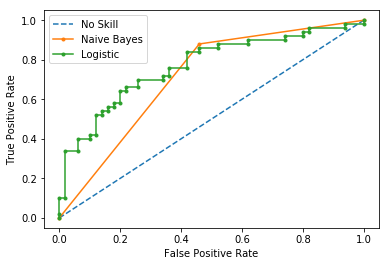

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.86
LR Specificity: 0.54
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.7
LR Specificity: 0.74
NB Sensitivity: 0.88
NB Specificity: 0.54
LR Sensitivity: 0.4
LR Specificity: 0.9
NB Sensitivity: 0.88
NB Specificity: 0.54


In [188]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

In the graph we can compare differents models for different thresholds.

The model with higher Area Under the Curve (AUC) is the logistic, with 0.768 witch could be a worthless classification. 



In [64]:
corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', df['review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [69]:
cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

Xx = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

yy = df.iloc[:, 1].values #Defining our response variable

In [70]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

[[16 36]
 [20 28]]
[[27 25]
 [28 20]]


In [71]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold_lr(threshold):
    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
def evaluate_threshold_nb(threshold):
    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])

evaluate_threshold_lr(5.654338e-41)
evaluate_threshold_nb(5.654338e-41)

evaluate_threshold_lr(0.357685)
evaluate_threshold_nb(0.357685)

evaluate_threshold_lr(0.5)
evaluate_threshold_nb(0.5)

evaluate_threshold_lr(0.75)
evaluate_threshold_nb(0.75)

No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.446
Logistic: ROC AUC=0.444


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold       tpr       fpr
0        2.0  0.000000  0.000000
1        1.0  0.583333  0.692308
2        0.0  1.000000  1.000000

threshold       tpr       fpr
0    1.956527  0.000000  0.000000
1    0.956527  0.020833  0.000000
2    0.856063  0.062500  0.000000
3    0.718132  0.062500  0.076923
4    0.705268  0.104167  0.076923
5    0.651409  0.104167  0.173077
6    0.644993  0.145833  0.173077
7    0.642523  0.145833  0.192308
8    0.631869  0.187500  0.192308
9    0.631719  0.187500  0.211538
10   0.625762  0.208333  0.211538
11   0.617660  0.208333  0.230769
12   0.587496  0.229167  0.230769
13   0.564562  0.229167  0.307692
14   0.545635  0.291667  0.307692
15   0.540841  0.291667  0.326923
16   0.540262  0.312500  0.326923
17   0.538659  0.312500  0.365385
18   0.533808  0.333333  0.365385
19   0.526335  0.333333  0.403846
20   0.525582  0.354167  0.403846
21   0.523672  0.354167  0.423077
22   0.522823  0.375000  0.423077
23   0.504782  0.375000  0.480769
24   0.501118  0.416667  0.480769
25   0.498738  0.416667  0.519231
26   0.493987  0.437500  0.519231
27   0.489941  0.437500  0.538462
28   0.487872  0.479167  0.538462
29   0.479838  0.479167  0.557692
30   0.476863  0.541667  0.557692
31   0.476016  0.541667  0.576923
32   0.475601  0.562500  0.576923
33   0.459077  0.562500  0.653846
34   0.454082  0.583333  0.653846
35   0.425032  0.583333  0.711538
36   0.418385  0.625000  0.711538
37   0.416044  0.625000  0.750000
38   0.380434  0.687500  0.750000
39   0.370363  0.687500  0.788462
40   0.362426  0.708333  0.788462
41   0.354611  0.708333  0.826923
42   0.353264  0.729167  0.826923
43   0.351295  0.729167  0.846154
44   0.324876  0.791667  0.846154
45   0.318125  0.791667  0.903846
46   0.316215  0.812500  0.903846
47   0.295029  0.812500  0.923077
48   0.264037  0.875000  0.923077
49   0.248737  0.875000  0.961538
50   0.241880  0.895833  0.961538
51   0.224059  0.895833  1.000000
52   0.107471  1.000000  1.000000

LR Sensitivity: 1.0
LR Specificity: 0.0
NB Sensitivity: 0.5833333333333334
NB Specificity: 0.3076923076923077
LR Sensitivity: 0.7083333333333334
LR Specificity: 0.21153846153846156
NB Sensitivity: 0.5833333333333334
NB Specificity: 0.3076923076923077
LR Sensitivity: 0.4166666666666667
LR Specificity: 0.5192307692307692
NB Sensitivity: 0.5833333333333334
NB Specificity: 0.3076923076923077
LR Sensitivity: 0.0625
LR Specificity: 1.0
NB Sensitivity: 0.5833333333333334
NB Specificity: 0.3076923076923077


Threshold 

In [163]:
#Decision Tree Classification  for dataset 
X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix
y = dataset.iloc[:, 1].values #Defining our response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[47 21]
 [14 43]]


In [110]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColorMap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Trainning set)')
ple.xlabel('review')
plt.ylabel('estimation')
plt.legend()
plt.show()

X_set, y_set = X_test, y_test
X1,X2  = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColorMap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
ple.xlabel('review')
plt.ylabel('estimation')
plt.legend()
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 1000 and input n_features is 2 

In [165]:
#Decision Tree Classification  for dataset 
Xx = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix
yy = df.iloc[:, 1].values #Defining our response variable

X_train, X_test, y_train, y_test = train_test_split(Xx, yy, test_size = 0.25, random_state = 0)

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[23 45]
 [24 33]]


com  

In [207]:
c = ''.join(map(str, corpus))

In [208]:
tokens = [t for t in c.split()]
 
print (tokens)

['also', 'tast', 'mom', 'multi', 'grain', 'pumpkin', 'pancak', 'pecan', 'butter', 'amaz', 'fluffi', 'delicirather', 'eat', 'airlin', 'food', 'seriouscant', 'say', 'enough', 'good', 'thing', 'placeambianc', 'incredwaitress', 'manag', 'friendliwould', 'recommend', 'placeoveral', 'impress', 'nocagyro', 'basic', 'lettucterribl', 'servicthoroughli', 'disappointmuch', 'pasta', 'love', 'homemad', 'hand', 'made', 'pasta', 'thin', 'pizzagive', 'tri', 'happifar', 'best', 'cheesecurd', 'everreason', 'price', 'alsoeveryth', 'perfect', 'nightfood', 'good', 'typic', 'bar', 'fooddrive', 'getfirst', 'glanc', 'love', 'bakeri', 'cafe', 'nice', 'ambianc', 'clean', 'friendli', 'staffanyway', 'think', 'go', 'backpoint', 'finger', 'item', 'menu', 'order', 'disappointoh', 'thing', 'beauti', 'bargone', 'gogreasi', 'unhealthi', 'mealfirst', 'time', 'might', 'lastburger', 'amazsimilarli', 'deliveri', 'man', 'say', 'word', 'apolog', 'food', 'minut', 'lateway', 'expenssure', 'order', 'dessert', 'even', 'need', 'p

In [209]:
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

also:10
tast:8
mom:1
multi:1
grain:1
pumpkin:1
pancak:1
pecan:1
butter:2
amaz:8
fluffi:1
delicirather:1
eat:7
airlin:1
food:35
seriouscant:1
say:10
enough:5
good:25
thing:6
placeambianc:1
incredwaitress:1
manag:4
friendliwould:1
recommend:8
placeoveral:1
impress:4
nocagyro:1
basic:1
lettucterribl:1
servicthoroughli:1
disappointmuch:1
pasta:3
love:5
homemad:3
hand:2
made:6
thin:4
pizzagive:1
tri:8
happifar:1
best:7
cheesecurd:1
everreason:1
price:7
alsoeveryth:1
perfect:7
nightfood:2
typic:1
bar:12
fooddrive:1
getfirst:1
glanc:1
bakeri:1
cafe:1
nice:15
ambianc:1
clean:5
friendli:11
staffanyway:1
think:6
go:20
backpoint:1
finger:1
item:1
menu:6
order:8
disappointoh:1
beauti:3
bargone:1
gogreasi:1
unhealthi:1
mealfirst:1
time:18
might:1
lastburger:1
amazsimilarli:1
deliveri:1
man:1
word:2
apolog:1
minut:8
lateway:1
expenssure:1
dessert:2
even:12
need:6
pack:1
tiramisu:1
cannoli:1
diefirst:1
wait:9
nextbartend:1
niceeveryth:1
tastiplace:1
two:4
thumb:1
waybest:1
place:24
vega:6
breakfast:2

lobster:1
roll:1
fantastbrother:1
law:1
mall:1
ate:1
day:3
guess:1
sick:1
nightgood:1
review:2
herea:1
tribut:2
event:1
held:1
last:2
nightchip:1
salsa:2
freshplace:1
greatmediocr:1
foodget:1
insid:1
placesuper:1
pissdservic:1
friendlisad:1
littl:3
veget:2
overcookplace:1
surprisgolden:1
crispi:1
delicihigh:1
hope:3
cook:4
charcoal:1
unfortun:1
fell:2
flat:1
flatcould:1
bruschetta:1
devinsingl:1
employe:2
water:2
refil:1
final:1
foodlastli:1
mozzarella:1
stick:1
orderfirst:1
tell:2
peopl:2
duckserver:1
neglig:1
unwelcom:1
suggest:1
placeservic:1
terribl:4
thoughplace:1
overpr:2
consist:1
boba:1
overprpacklove:1
placesay:1
yummifood:1
terriblseason:1
fruit:1
fresh:3
white:2
peach:1
purekept:1
wors:2
offici:1
doneplace:1
honestli:1
blowndefinit:1
eatwast:1
moneylove:1
put:1
plastic:1
contain:3
oppos:1
cram:1
takeout:1
boxcr:1
pe:1
delic:1
moistaw:1
servicever:1
gofood:1
horriblprice:1
rather:2
goneservic:1
fair:1
bestlove:1
kabuki:1
hip:1
servicfavor:1
away:1
dishpoor:1
worth:2
waitbest:

Plot of most frequent words

In [213]:
freq.plot(20, cumulative=False)

In [214]:
for ent in c.ents:
    print(ent.text,"-", ent.start_char,"-", ent.end_char,"-", ent.label_)


AttributeError: 'str' object has no attribute 'ents'

In [215]:
zen.sentences


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  Attempted to load tokenizers/punkt/english.pickle

  Searched in:
    - 'C:\\Users\\Celia.Riquelme/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Celia.Riquelme\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
